# Tree Detector YOLOv5

This version of the Tree Detector uses YOLOv5, a bleeding edge object detection architecture


In [1]:
import numpy as np
import torch
import glob


import matplotlib.pyplot as plt
%matplotlib inline

from utils.image_processor import Image_processor

from utils.prediction_utils import predict
from models.common import DetectMultiBackend

In [ ]:
%%bash

(python train.py \
--img 256 \
--batch 32 \
--epochs 20 \
--cfg "models/yolov5s.yaml" \
--data custom.yaml \
--weights "runs/train/exp46/weights/best.pt" \
--evolve 50)

In [ ]:
%%bash



(python3 detect.py \
--weights runs/train/exp34/weights/best.pt \
--source training-assets/datasets/trees-4band/test/images/val2017/ \
--data data/custom.yaml \
--conf-thres 0.2 \
--iou-thres 0.2 \
--max-det 5000 \
--hide-labels \
--hide-conf \
--imgsz 300)

In [ ]:
%%bash 

(python3 val.py  \
--weights "runs/train/exp11/weights/best.pt" \
--data "data/uavtrees-no-nordegg.yaml" \
--batch-size 32 \
--img 800 \
--half \
--task test)

In [2]:
# Model 32 for ALL
# Model 25, 31 is for nordegg
# Model 23 is for Lobstick
# Model 27, 30 is for Kananaskis
# Model 28, 29 is for Coleman


model = DetectMultiBackend(weights="runs/train/exp32/weights/best.pt", device=torch.device('cuda'), dnn=False, data=None, fp16=True)
PCA_mat = None #torch.load("pca/pca_mat-no-bragg.pt")

ip = Image_processor()

Fusing layers... 
YOLOv5l summary: 367 layers, 46119048 parameters, 0 gradients


Predicting on Batch: 100%|████████████████████████████████████| 53/53 [00:07<00:00,  6.87it/s]
mkdir: cannot create directory ‘.temp’: File exists


TEST
Running Final NMS...
Saving Prediction...
Done.


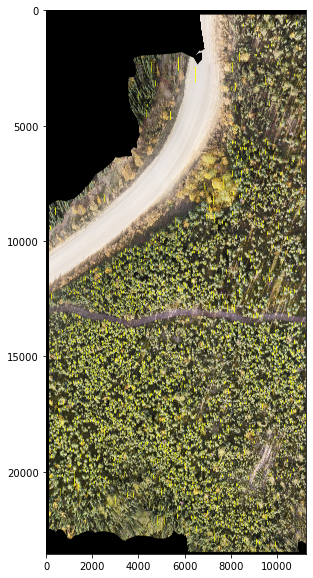

In [3]:
imgpath = "datasets/uavtrees-no-nordegg-VOC/test/images/Nordegg_Flight1_Mini_06-19-20_trimmed.tif"
imgpath = "datasets/uavtrees-no-lobstick-VOC/test/images/Lobstick_Prop_3_5_Ent_06-07-22_trimmed.tif"
imgpath = "datasets/uavtrees-no-kananaskis-VOC/test/images/Kananaskis_Flight1_Mini_06-10-20_trimmed.tif"
# imgpath = "datasets/uavtrees-no-kananaskis-VOC/test/images/Kananaskis_Flight1_Mini_06-22-20_trimmed.tif"
# imgpath = "datasets/uavtrees-no-coleman-VOC/test/images/Coleman_Flight1_Mini_06-12-20_trimmed.tif"
# imgpath = "datasets/uavtrees-no-coleman-VOC/test/images/Coleman_Flight2_Mini_06-12-20_trimmed.tif"
# imgpath = "datasets/uavtrees-no-coleman-VOC/test/images/Coleman_Flight3_Mini_06-12-20_trimmed.tif"
imgpath = "predictions/flight45_3band.tif"
imgpath = "/home/computecore/Downloads/Conklin_Flight1_3Band.tif"

predict(model=model, 
        input_img_path=imgpath, 
        nms_thresh=0.6, 
        thresh=0.01)
%matplotlib inline

ip.draw_boxes_with_class(img_path=imgpath, label_path="predictions/predictions_NMS.xml")

## Validation Performance vs Number of Trees (test on Kananaskis)

##### Model 35: Train-val on Coleman 1, 2, 3, Nordegg 1, Lobstick 12, 18_25, 3_5, 47 (7392 Trees), test on Kananaskis 6-10
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
               |  all    |    762    |   1610    |  0.379   |   0.644  |    0.414   |    0.25|
               |  con    |    762   |    1608   |   0.752   |   0.788  |    0.823   |   0.497|
               |  dec     |   762    |      2   | 0.00528  |      0.5  |  0.00538  |  0.00376|



##### Model 36: Train-val on Coleman 1, 2, 3, Lobstick 12, 18_25, 3_5, 47 (6699 Trees)
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
               |  all    |    762   |    1610   |   0.363   |   0.889 |     0.409  |    0.245|
               |  con      |  762   |    1608   |   0.722   |   0.778  |    0.807  |    0.484|
               |  dec    |    762 |         2  |  0.00353   |       1  |   0.0107  |  0.00637|


##### Model 37: Train-val on Coleman 1, 2, 3, Lobstick 12, 18_25, 3_5  (6524 Trees)
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
               |  all    |    762  |     1610  |    0.369 |    0.882   |   0.402   |   0.238|
              |   con    |    762   |    1608  |    0.732  |    0.764 |     0.797  |    0.474|
               |  dec   |     762   |       2 |   0.00576  |        1 |   0.00634  | 0.00302|



##### Model 38: Train-val on Coleman 1, 2, 3, Lobstick 12, 18_25  (4029 Trees)
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                | all    |    762   |    1610  |    0.365  |    0.631  |    0.404   |   0.238|
               |  con   |     762    |   1608  |    0.725  |    0.762  |    0.804  |    0.474|
               |  dec   |     762    |      2  |  0.00618  |      0.5 |   0.00421  |  0.00253|
               
               
##### Model 39: Train-val on Coleman 1, 2, 3, Lobstick 12,  (3226 Trees)
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
|all    |    762    |   1610   |   0.346   |   0.606  |    0.384   |   0.222|
|con    |    762     |  1608   |    0.69   |   0.712  |    0.766  |    0.442|
|dec    |    762    |      2   | 0.00189   |     0.5  |  0.00173  |  0.00106|


##### Model 40: Train-val on Coleman 1, 2, 3,  (1382 Trees)
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |    762    |   1610   |    0.35   |   0.362   |    0.38   |   0.206|
                 |con    |    762     |  1608   |     0.7   |   0.724   |   0.755  |    0.411|
                 |dec    |    762     |     2    |      0    |      0  |  0.00435   | 0.00174|
                 
                 
##### Model 41: Train-val on Coleman 1, 2,   (703 Trees)
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all     |   762   |    1610   |   0.299  |    0.326  |    0.311  |    0.172|
                 |con     |   762   |    1608  |    0.598   |   0.652  |    0.621  |    0.344|
                 |dec     |   762     |     2     |     0    |      0  | 0.000148 |  4.42e-05|
                 
##### Model 43: Train-val on Coleman 1   (309 Trees)
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all     |   762    |   1610    |  0.239   |   0.255  |    0.219  |   0.0876|
                 |con     |   762    |   1608    |  0.479   |   0.509  |    0.439  |    0.175|
                 |dec     |   762    |      2    |      0   |       0  | 0.000204  | 8.18e-05|


## Validation Performance vs Number of Trees (test on Coleman)

##### Model 44: Train-val on Nordegg 1, Lobstick 12, 18_25, 3_5, 47, kananaskis 1, 2  (7816 Trees), test on Coleman
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |    792    |   1300    |  0.517   |   0.543   |   0.478   |   0.232|
                 |con    |    792    |   1083   |   0.629   |   0.708   |   0.685   |   0.338|
                 |dec    |    792     |   217    |  0.406   |   0.378    |  0.271   |   0.126|
                 
                 
                 
##### Model 45: Train-val on Nordegg 1, Lobstick 12, 18_25, 3_5, 47, kananaskis 2  (7134 Trees), test on Coleman
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all     |   792   |    1300  |    0.527   |    0.55   |   0.478   |    0.23|
                 |con    |    792    |   1083  |    0.632  |    0.717  |    0.684  |    0.332|
                 |dec     |   792    |    217  |   0.423   |   0.382  |    0.272   |   0.128|

##### Model 46: Train-val on Nordegg 1, Lobstick 12, 18_25, 3_5, 47 (6010 Trees), test on Coleman
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |   792    |   1300    |   0.45   |   0.483   |   0.379   |   0.177|
                 |con      |  792    |   1083   |   0.641   |   0.574   |     0.6  |    0.285|
                 |dec     |   792    |    217   |   0.259   |   0.392   |   0.157  |   0.0695|
                 
 ##### Model 47: Train-val on Nordegg 1, Lobstick 12, 18_25, 47 (3515 Trees), test on Coleman
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all     |   792  |     1300    |  0.359  |    0.463  |    0.332   |   0.145|
                 |con    |    792   |    1083   |   0.578  |    0.576  |    0.558   |   0.249|
                 |dec    |    792   |     217    |  0.141  |     0.35  |    0.106   |  0.0414|
                 
 ##### Model 48: Train-val on Nordegg 1, Lobstick 12, 18_25 (3340 Trees), test on Coleman
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |    792   |    1300   |   0.399   |   0.468   |   0.356   |   0.152|
                 |con    |    792   |    1083   |   0.642   |   0.553   |   0.583   |   0.254|
                 |dec    |    792   |    217    |  0.156    |  0.382    |   0.13    | 0.0508|
                 
 ##### Model 49: Train-val on Nordegg 1, Lobstick 12, (2537 Trees), test on Coleman
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all   |     792   |    1300   |   0.331   |   0.419   |   0.307   |   0.134|
                 |con    |    792    |   1083   |   0.536   |   0.558  |    0.533   |   0.236|
                 |dec   |     792   |     217   |   0.126   |   0.281  |   0.0813   |  0.0312|
                 
                 
 ##### Model 50: Train-val on Nordegg 1, (693 Trees), test on Coleman
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |    792   |    1299   |   0.737   |    0.23  |    0.218   |  0.0998|
                 |con     |   792   |    1082  |    0.474   |    0.46  |    0.429  |    0.195|
                 |dec    |    792   |    217    |      1     |     0   | 0.00715   | 0.00475|

## Validation Performance vs Number of Trees (Nordegg)

#### Model 52: Train-val on Lobstick 12, 18_25, 3_5, 47, kananaskis 1, 2, Coleman 1, 2, 3  (8505 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all   |     736    |    761   |   0.709   |   0.689    |  0.702   |   0.395|
                 |con   |     736    |    761   |   0.709   |   0.689    |  0.702   |   0.395|
                 
                 
##### Model 53: Train-val on Lobstick 12, 18_25, 3_5, 47, kananaskis 1, Coleman 1, 2, 3  (7381 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |    736     |   761   |   0.691   |   0.678   |   0.695   |   0.374|
                 |con    |    736     |   761    |  0.691   |   0.678  |    0.695   |   0.374|
                 
                 
##### Model 54: Train-val on Lobstick 18_25, 3_5, 47, kananaskis 1, Coleman 1, 2, 3  (5537 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all      |  736      |  761    |  0.657   |   0.691   |   0.686   |   0.377|
                 |con     |     736     |   761    |  0.657    |  0.691    |  0.686   |   0.377|
                 
##### Model 56: Train-val on Lobstick 3_5, 47, kananaskis 1, Coleman 1, 2, 3  (4734 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all     |   736      |  761   |   0.684   |   0.668   |    0.71   |   0.389|
                 |con     |   736      |  761   |   0.684    |  0.668   |    0.71   |   0.389|
                 
                 
##### Model 57: Train-val on Lobstick 3_5, 47,  Coleman 1, 2, 3  (4052 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |    736   |     761   |   0.668   |   0.569   |   0.629   |    0.32|
                 |con    |    736   |     761   |   0.668   |   0.569   |   0.629   |    0.32|

##### Model 58: Train-val on Lobstick 3_5, 47,  Coleman 2, 3  (3743 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |    736    |    761   |   0.684   |   0.555    |   0.61   |   0.315|
                 |con    |    736    |    761   |   0.684   |   0.555    |   0.61   |   0.315|
                 
                 
##### Model 59: Train-val on Lobstick 3_5,  Coleman 2, 3  (3568 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all     |   736     |   761   |   0.577   |   0.625    |   0.59   |   0.293|
                 |con    |    736     |   761   |   0.577   |   0.625    |   0.59   |   0.293|

##### Model 60: Train-val on Lobstick 3_5,  Coleman 2  (2889 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |    736     |   761   |   0.621  |    0.549  |    0.566   |   0.252|
                 |con   |     736     |   761   |   0.621  |    0.549  |    0.566   |   0.252|

##### Model 61: Train-val on Coleman 2  (394 Trees), test on Nordegg
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all     |   736    |    760  | 0.000979  |  0.00132 |  0.000505 |  0.000126|
                 |con     |   736     |   760   |0.000979  |  0.00132 |  0.000505 |  0.000126|


## Validation Performance vs Number of Trees (Lobstick)

##### Model 62: Train-val on Coleman 1, 2, 3, Kananaskis 1, 2, Nordegg 1  (3881 Trees), test on Lobstick
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all   |    1085   |    7385   |   0.698   |   0.179   |    0.19   |  0.0796|
                 |con   |    1085   |    4914   |   0.548  |    0.389  |    0.371   |   0.148|
                 |dec   |    1085   |    2122   |   0.547   |   0.147   |   0.197   |  0.0892|
                |snag    |   1085     |   349     |     1    |      0  |  0.00299  |  0.00143|
                
##### Model 63: Train-val on Coleman 1, 3, Kananaskis 1, 2, Nordegg 1  (3487 Trees), test on Lobstick
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all   |    1085   |    7430   |   0.634  |    0.192   |   0.184  |   0.0765|
                 |con    |   1085   |    4909   |   0.511  |    0.347  |    0.334   |   0.139|
                 |dec   |    1085   |    2172   |    0.39   |   0.228  |    0.213   |  0.0882|
                |snag   |    1085   |     349     |     1      |    0  |  0.00469  | 0.00192|

##### Model 64: Train-val on Coleman 1, Kananaskis 1, 2, Nordegg 1  (2808 Trees), test on Lobstick
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all   |    1085  |     7415  |    0.643  |    0.184  |    0.185  |    0.077|
                 |con    |   1085   |    4912  |    0.496  |     0.33   |   0.326  |    0.131|
                 |dec   |    1085   |    2154   |   0.432  |    0.221   |   0.228  |   0.0987|
                |snag   |    1085   |     349   |       1   |       0   | 0.00244  |  0.00101|
                
                
##### Model 65: Train-val on Coleman 1, Kananaskis 1, 2,   (2115 Trees), test on Lobstick
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all    |   1085    |   7420   |   0.642   |     0.2  |    0.204   |  0.0875|
                 |con   |    1085    |   4913   |   0.476   |   0.378  |    0.357  |    0.147|
                 |dec    |   1085   |    2157   |    0.45   |   0.222  |    0.249  |    0.113|
                |snag   |    1085   |     350   |       1   |       0  |  0.00477  |  0.00205|
                
                
##### Model 66: Train-val on Coleman 1, Kananaskis 2,   (1433 Trees), test on Lobstick
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all   |    1085    |   7430   |   0.662   |   0.202   |   0.214  |   0.0906|
                 |con    |   1085    |   4914   |   0.507   |   0.409   |   0.398  |    0.163|
                 |dec    |   1085    |   2164   |   0.479   |   0.196   |    0.24  |    0.107|
                |snag   |    1085    |    352   |       1   |       0   | 0.00261  |   0.0011|
                
##### Model 67: Train-val on  Kananaskis 2,   (1124 Trees), test on Lobstick
| Class | Images | Labels | P | R | mAP@.5 | mAP@.5:.95 |
|-----|-----|-----|---|-----|-----|-----|
                 |all   |    1085    |   7432  |    0.105  |    0.111  |   0.0889 |    0.0413|
                 |con   |    1085    |   4911  |    0.123  |    0.224  |    0.157 |    0.0683|
                 |dec   |    1085    |   2170  |    0.185  |   0.0889  |    0.106 |     0.054|
                |snag   |    1085    |    351  |  0.00717  |   0.0199  |  0.00386 |   0.00155|